In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/crop_yield.csv")

In [ ]:
print(df)

                Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0

In [ ]:
# shape of dataset
print("Shape:", df.shape)

# column names
print("\nColumns:")
print(df.columns)

# data types
print("\nData Types:")
print(df.dtypes)

# missing values
print("\nMissing values:")
print(df.isnull().sum())


Shape: (19689, 10)

Columns:
Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

Data Types:
Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

Missing values:
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [ ]:
# remove duplicates
df = df.drop_duplicates()

# remove invalid rows
df = df[df['Area'] > 0]
df = df[df['Yield'] > 0]

print("Shape after cleaning:", df.shape)


Shape after cleaning: (19577, 10)


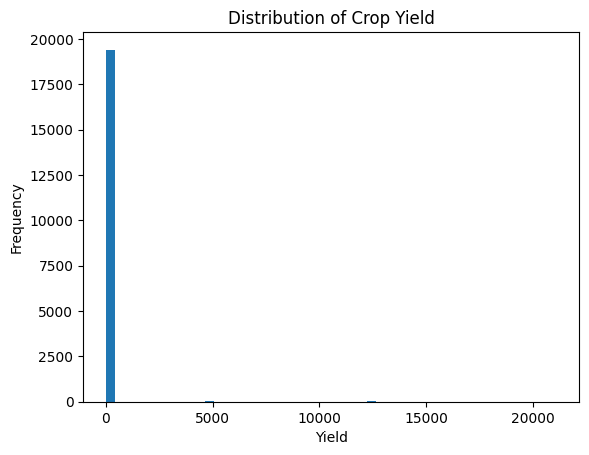

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Yield'], bins=50)
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.title("Distribution of Crop Yield")
plt.show()



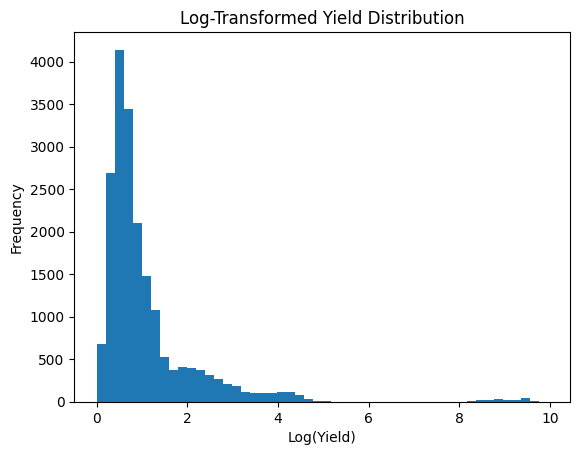

In [ ]:
df['Yield_log'] = np.log1p(df['Yield'])
plt.figure()
plt.hist(df['Yield_log'], bins=50)
plt.xlabel("Log(Yield)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Yield Distribution")
plt.show()


In [ ]:
X = df.drop(['Yield', 'Yield_log'], axis=1)
y = df['Yield_log']
X = pd.get_dummies(
    X,
    columns=['Crop', 'Season', 'State'],
    drop_first=True
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (15661, 94)
Test shape: (3916, 94)


In [ ]:
#Baseline Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression (Log Yield)")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)


Linear Regression (Log Yield)
MAE: 0.25727352738630094
RMSE: 0.4014777653730689
R2: 0.8690467407740345


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest (Log Yield)")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)


Random Forest (Log Yield)
MAE: 0.0679431476725301
RMSE: 0.18262080107048836
R2: 0.9729047100753774


In [ ]:
print("MODEL COMPARISON")
print(f"Linear Regression R2: {r2_lr}")
print(f"Random Forest R2: {r2_rf}")


MODEL COMPARISON
Linear Regression R2: 0.8690467407740345
Random Forest R2: 0.9729047100753774


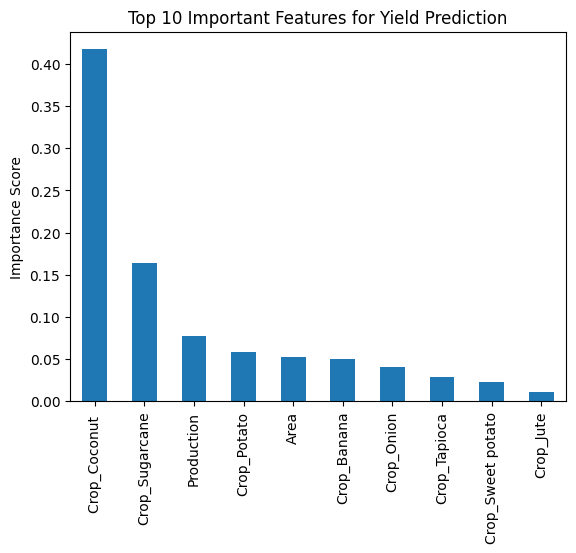

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure()
importances.head(10).plot(kind='bar')
plt.title("Top 10 Important Features for Yield Prediction")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
actual_yield = np.expm1(y_test.iloc[0])
predicted_yield = np.expm1(y_pred_rf[0])

print("Actual Yield:", actual_yield)
print("Predicted Yield:", predicted_yield)


Actual Yield: 4.026250000000001
Predicted Yield: 4.4211854360632525


In [ ]:
for i in range(5):
    actual = np.expm1(y_test.iloc[i])
    predicted = np.expm1(y_pred_rf[i])
    print(f"Sample {i+1} → Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Sample 1 → Actual: 4.03, Predicted: 4.42
Sample 2 → Actual: 0.52, Predicted: 0.59
Sample 3 → Actual: 13.75, Predicted: 14.82
Sample 4 → Actual: 1.15, Predicted: 1.14
Sample 5 → Actual: 0.27, Predicted: 0.33


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.0679431476725301
RMSE: 0.18262080107048836
R² Score: 0.9729047100753774


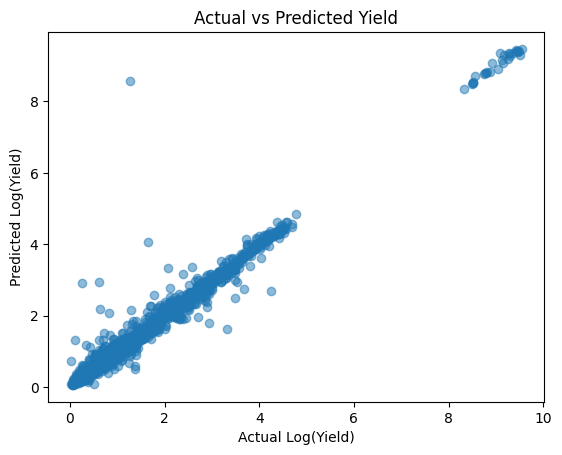

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Log(Yield)")
plt.ylabel("Predicted Log(Yield)")
plt.title("Actual vs Predicted Yield")
plt.show()


In [ ]:
import joblib
joblib.dump(rf, "crop_yield_rf_model.pkl")


['crop_yield_rf_model.pkl']